## Student Name: [Michael Corrado]

#import any required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

In [2]:
#import any required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

In [3]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers

In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Step 1 – Data Acquisition
Load the training data 'house_prices_train.csv' into a dataframe. Explore the data to get a better understanding of its structure and any data preparation steps that you need to perform.

In [6]:
#Load the data and view the dimensions

data = pd.read_csv("/content/gdrive/MyDrive/house_prices_train.csv") #TODO: provide the url for the training data
data_dim = data.shape

print ('There are {} rows and {} columns.'.format(data_dim[0], data_dim[1]))

There are 1460 rows and 81 columns.


Lets view samples of the data

In [7]:
#view a few observations
data.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [8]:
list(data.columns.values.tolist())

['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

#### Use your intuition!
At first glance is there any field that, without a doubt, will not contribute to the predictions?

In [9]:
#TODO: remove/exclude the unnecessary field(s) that will not contribute towards the prediction
data=data.drop(columns=['Id', 'MiscFeature'])

### Step 2 – Data Exploration
- Gather summary/descriptive statistics and inspect **all the fields**. This can help you to identify outliers and detect any inconsistencies
- View the frequency of missing values.

In [10]:
#TODO: gather descriptive statistics to view the range of values in each field. 

data.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


In [11]:
#TODO: show the frequency of missing values
data.isnull().sum().sum()

5559

In [12]:
data.columns[data.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence'],
      dtype='object')

In [13]:
data1=data[['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence']]

In [14]:
data1.isnull().sum()/1460

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
dtype: float64

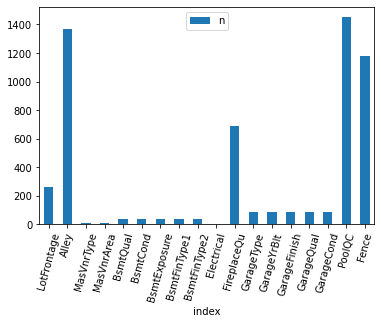

In [15]:
data1.isna().sum().reset_index(name="n").plot.bar(x='index', y='n', rot=75)

State your observations about the summary statistics and missing values **(in this cell)**:
- alot of missing data is coming from alley, I am guessing these structres do not have an alley so it is not included.
-  Another location where missing data is seen is within pool and fence.
- Since not many houses have a pool or a fence I belive that these columns coulmns should be droped from the dateset

Note: recall that not all missing values need to be deleted, some of them can be imputed.

#### The continuous and categorical independent variables
List the continuous and categorical data and state any discrepancy between the number of expected records in the dataset and the `count` that is reported above. 

For the fields that are discussed, view `data_description.txt` which explains the range of values for each field. What does this tell you about these 'missing' values. How do you recommend addressing them? **(You do not need to demonstrate your recommendations)**


#### The dependent variable
Are there any discrepancies with the dependent variable? Plot a histogram showing its distribution. Is the distribution skewed?

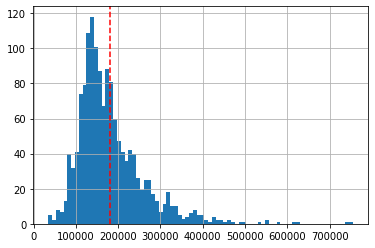

In [16]:
#TODO: Plot the histogram
data['SalePrice'].hist(bins=80).axvline(np.mean(data['SalePrice']), color='red', linestyle='--') 

## Building the Pipeline
Based on your recommendations above, lets build a pipeline that does the following:
- prepare the data and perform data imputation
- transform the continuous and categorical data (scaling and encoding respectively)
- select the useful features e.g. feature selection, *you can optionally include this in the pipeline or perform this step prior to building the pipeline*
- build, train and evaluate the neural network using Keras.
- perform hyper-parameter tuning using RandomSearchCV **(optional)**
- make predictions with new data

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [18]:
cols = data1.columns

num_cols = data1._get_numeric_data().columns
num_cols

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [19]:
list(set(cols) - set(num_cols))

['BsmtCond',
 'BsmtFinType2',
 'GarageQual',
 'Alley',
 'GarageFinish',
 'BsmtQual',
 'BsmtFinType1',
 'PoolQC',
 'Electrical',
 'MasVnrType',
 'Fence',
 'FireplaceQu',
 'GarageType',
 'BsmtExposure',
 'GarageCond']

### Step 3 – Data Preparation
Here is some helpful information on [preprocessing and feature extraction pipelines in scikit-learn](https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html)

<span style="color:red">NOTE: You can modify the cell below to suit your needs. However, ensure that the preprocessing steps that you perform is done in the data frame e.g. `data` </span>

In [20]:
#impute missing continuous values with the median and scale the data

continuous_features  = ["LotFrontage", "GarageYrBlt","MasVnrArea"]  #TODO: provide a list of continuous fields that will be used in the model(except the dependent variable)
continous_transformer = Pipeline(
    steps = [
    ('imputer', SimpleImputer(strategy = 'median')),
    ('scaler', StandardScaler())
    ])

#impute the NA categorical values and encode the data

categorical_features = ['Fence','MasVnrType','BsmtFinType2','FireplaceQu',
 'BsmtExposure','GarageType','GarageCond','Alley','GarageQual','Electrical',
'BsmtQual','BsmtCond','BsmtFinType1','PoolQC','GarageFinish']

 #TODO: provide a list of categorical fields that will be used in the model
categorical_transformer = Pipeline(
    steps = [
    ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'NotApp')), #Use an alternative value to indicate NA in the dataset
    ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ])

data_preprocessor   = ColumnTransformer(
    transformers = [
        ('continious', continous_transformer, continuous_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

#NOTE: the steps above will not be performed until we call `fit_transform` (in the next cell).


### Step 4 – Data Transformation & Feature Selection
Here is some helpful information on [feature selection as part of a pipeline](https://scikit-learn.org/stable/modules/feature_selection.html#feature-selection-as-part-of-a-pipeline). If you add a feature selection algorithm to the pipeline, ensure that it supports regression.

In [27]:
data_prep_pipeline  = Pipeline(steps=[('preprocessor', data_preprocessor)]) #This performs the data preparation steps in the cell above


transformed_data = data_prep_pipeline.fit_transform(data.iloc[:, :-1], data['SalePrice']) #transform the data
type(transformed_data)
transformed_data = transformed_data.toarray()

### Step 5 – Building the Model
#### Build the neural network using Keras
Build a feed forward neural network with: an input layer, hidden layers and one output layer. 

Note: you are required to provide a suitable [optimizer](https://keras.io/api/optimizers/) and [loss function](https://keras.io/api/losses/) for the regression task. Optimizers include: 'Adam', 'SGD' and RMSprop. Loss functions include: 'mean_squared_error', 'mean_squared_logarithmic_error', 'mean_absolute_error'

In [80]:
import array
X = transformed_data #this is the transformed data from the pipeline
y = data['SalePrice'] #this is the output

#Build a sequential model with at least three dense layers (you can add more layers as needed)
#Note: you can also add this keras model to the data preprocessing pipeline but we can skip that step for now.
ffnn_model = Sequential()

ffnn_model.add(Dense(50, activation='relu', input_shape=(X.shape[1],))) #X.shape[1] is the number of selected features 
#TODO: Add the first hidden layer with a suitable number of units/neurons and the 'relu' activation function
ffnn_model.add(Dense(40, activation='relu', input_shape=(X.shape[1],)))
#TODO: Add the second hidden layer with a suitable number of units/neurons and the 'relu' activation function
ffnn_model.add(Dense(20, activation='relu', input_shape=(X.shape[1],)))
#TODO: Add the output layer
ffnn_model.add(Dense(1, activation='relu', input_shape=(X.shape[1],)))

ffnn_model.compile(optimizer= 'Adam', #TODO: state the optimize
                   loss='mean_squared_logarithmic_error' ,      #TODO: state the loss function
                   metrics='mae'     #TODO: state the metric
                  )

ffnn_history = ffnn_model.fit(X, y, 
                              validation_split= 0.3, #TODO: state the validation split
                              epochs= 100, #TODO: state the number of epochs (you may need to run the model a few times to find a suitable value)
                              batch_size= 15, #TODO: state the number of observations to use in each batch
                              verbose=3)


Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

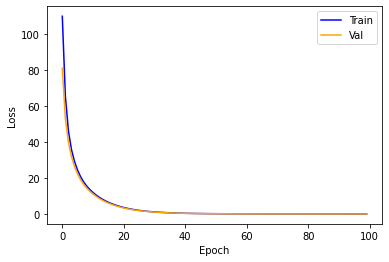

In [82]:
# Visualize the training and validation loss
plt.plot(ffnn_history.history['loss'], 'b', ffnn_history.history['val_loss'], 'orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

### Let's use the neural network to make predictions!

#### Load the test data

In [83]:
#TODO: Load the data from `house_prices_test.csv`
#test_data_url = ''
test_data = pd.read_csv("/content/gdrive/MyDrive/house_prices_test.csv")


#### Prepare the test data using the pipeline
This will impute any missing values and scale/encode the fields.

In [84]:
prep_test_data = data_prep_pipeline.transform(test_data)

#### Use the neural network to make predictions

In [85]:
result = ffnn_model.predict(prep_test_data) #TODO: provide the preprocessed test data (above)
print(result)

[[144649.78]
 [165838.39]
 [190680.95]
 ...
 [184097.66]
 [123250.65]
 [196566.47]]


## Summary
Display samples of the predictions from your model and summarize your thoughts on the model's performance, the training process and its ability to generalize with new data. What are your recommendations to improve the model in the future?

The model is predicting that the house prices will be from 144,000 to 196,000. This is close the the average hosue price within the dataset. It is exciting to see the model learn as it completes more epochs. I had alot of fun hypertunning the model and creating this neural network.

I would recomend using a smaller batch size when completing the model. I learned that a larger batch size can cuase overfitting within the model